# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from matplotlib.lines import Line2D

from mpl_toolkits import mplot3d

from scipy.signal import find_peaks

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02d_visualization_sulfate'

# Loading data

## $K_2SO_4$

In [4]:
path_to_data = './../data/files_sulfate'

In [5]:
data_k2so4 = pd.read_csv(f'{path_to_data}/K2SO4.dpt', sep=",", header=None, names=['wavenumber', 'absorbance'])

print(data_k2so4.shape)
data_k2so4.head(3)

(3733, 2)


,wavenumber,absorbance
0,3998.31069,0.00458
1,3997.34631,0.00458
2,3996.38194,0.00458


## $MnSO_4$

In [6]:
path_to_data = './../data/files_sulfate'

In [7]:
data_mnso4 = pd.read_csv(f'{path_to_data}/MnSO4.dpt', sep=",", header=None, names=['wavenumber', 'absorbance'])

print(data_mnso4.shape)
data_mnso4.head(3)

(3733, 2)


,wavenumber,absorbance
0,3998.31069,0.00339
1,3997.34631,0.00339
2,3996.38194,0.00339


# Data processing

## Selection of main specral components

In [8]:
wavenumber_k2so4 = data_k2so4['wavenumber'].values
spectrum_k2so4 = data_k2so4['absorbance'].values

In [9]:
wavenumber_mnso4 = data_mnso4['wavenumber'].values
spectrum_mnso4 = data_mnso4['absorbance'].values

## Selecting fingerprint region (1900-800 cm$^{–1}$)

In [10]:
fingerprint_mask_k2so4 = (wavenumber_k2so4 <= 1900) & (wavenumber_k2so4 >= 500)

wavenumber_k2so4_fpr = wavenumber_k2so4[fingerprint_mask_k2so4]
spectrum_k2so4_fpr = spectrum_k2so4[fingerprint_mask_k2so4]

In [11]:
fingerprint_mask_mnso4 = (wavenumber_mnso4 <= 1900) & (wavenumber_mnso4 >= 500)

wavenumber_mnso4_fpr = wavenumber_mnso4[fingerprint_mask_mnso4]
spectrum_mnso4_fpr = spectrum_mnso4[fingerprint_mask_mnso4]

## Scaling to range [0...1] (*MinMax*)

In [12]:
spectrum_k2so4_fpr_normalized = (spectrum_k2so4_fpr- np.min(spectrum_k2so4_fpr)) / (np.max(spectrum_k2so4_fpr) - np.min(spectrum_k2so4_fpr))

In [13]:
spectrum_mnso4_fpr_normalized = (spectrum_mnso4_fpr - np.min(spectrum_mnso4_fpr)) / (np.max(spectrum_mnso4_fpr) - np.min(spectrum_mnso4_fpr))

# Spectra visualization

## Base variables

In [14]:
FONT_SIZE_TITLE = 16

FONT_SIZE_XLABEL = 16
FONT_SIZE_YLABEL = 16

FONT_SIZE_XTICKS = 13
FONT_SIZE_YTICKS = 13

## Peaks analysis

In [15]:
def find_spectrum_peaks(wavenumber, spectrum, prominence=0.03, height=0.05, width=10):
    peaks, properties = find_peaks(
        spectrum,
        prominence=prominence,
        height=height,
        width=width
    )
    
    peak_positions = wavenumber[peaks]
    peak_intensities = spectrum[peaks]
    
    return peak_positions, peak_intensities, properties

In [16]:
peaks_k2so4, intensities_k2so4, _ = find_spectrum_peaks(
    wavenumber_k2so4_fpr,
    spectrum_k2so4_fpr_normalized,
    prominence=0.03,
    height=0.05,
    width=5
)

In [17]:
peaks_mnso4, intensities_mnso4, _ = find_spectrum_peaks(
    wavenumber_mnso4_fpr,
    spectrum_mnso4_fpr_normalized,
    prominence=0.03,
    height=0.05,
    width=5
)

## Visualization

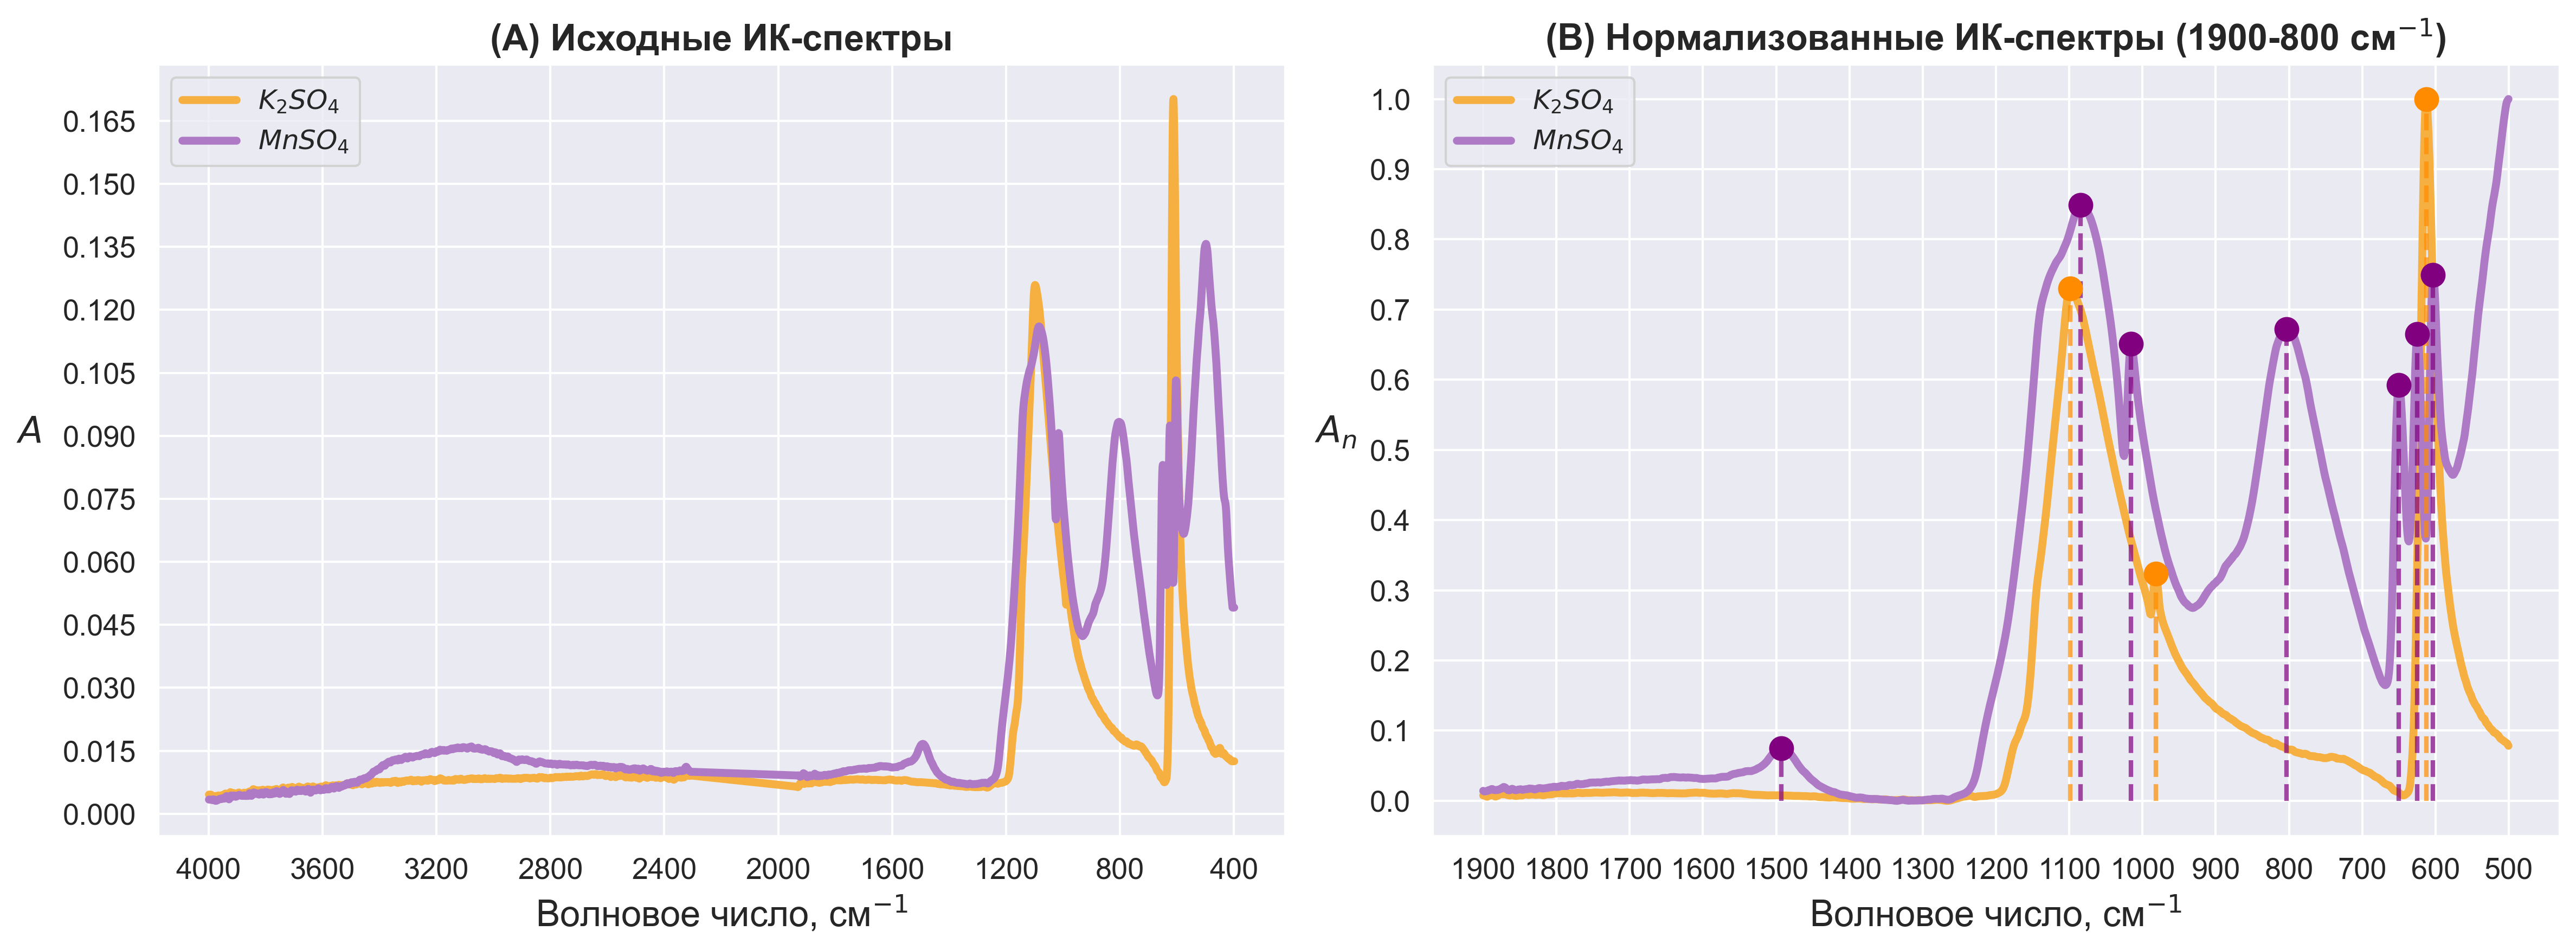

In [18]:
# Создание графика
sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

# Subploe №1
axes[0].plot(wavenumber_k2so4, spectrum_k2so4, label=f'$K_2SO_4$', linewidth=3.5, color='#F5B041', alpha=1.0)
axes[0].plot(wavenumber_mnso4, spectrum_mnso4, label=f'$MnSO_4$', linewidth=3.5, color='#AF7AC5', alpha=1.0)

axes[0].set_title('(A) Исходные ИК-спектры', fontsize=FONT_SIZE_TITLE, fontweight='bold')

axes[0].set_xlabel('Волновое число, см$^{-1}$', fontsize=FONT_SIZE_XLABEL)
axes[0].set_ylabel('$A$', fontsize=FONT_SIZE_YLABEL, rotation=0, labelpad=15)

axes[0].tick_params(axis='x', labelsize=FONT_SIZE_XTICKS)
axes[0].tick_params(axis='y', labelsize=FONT_SIZE_YTICKS)

axes[0].xaxis.set_major_locator(ticker.MultipleLocator(400))
axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.015))

axes[0].invert_xaxis()

axes[0].legend(loc='upper left', fontsize=12)

# Subploe №2 (fingerprint region & normalized)

axes[1].plot(wavenumber_k2so4_fpr, spectrum_k2so4_fpr_normalized,  label=f'$K_2SO_4$', linewidth=3.5, color='#F5B041', alpha=1.0)
axes[1].plot(wavenumber_mnso4_fpr, spectrum_mnso4_fpr_normalized, label=f'$MnSO_4$', linewidth=3.5, color='#AF7AC5', alpha=1.0)

axes[1].scatter(peaks_k2so4, intensities_k2so4, color='darkorange', s=100, zorder=3)
axes[1].scatter(peaks_mnso4, intensities_mnso4, color='purple', s=100, zorder=3)


for peak, intensity in zip(peaks_k2so4, intensities_k2so4):
    axes[1].vlines(x=peak, ymin=0, ymax=intensity, color='darkorange', linestyle='--', linewidth=2, alpha=0.7)

for peak, intensity in zip(peaks_mnso4, intensities_mnso4):
    axes[1].vlines(x=peak, ymin=0, ymax=intensity, color='purple', linestyle='--', linewidth=2, alpha=0.7)


axes[1].set_title('(B) Нормализованные ИК-спектры (1900-800 см$^{-1}$)', fontsize=FONT_SIZE_TITLE, fontweight='bold')

axes[1].set_xlabel('Волновое число, см$^{-1}$', fontsize=FONT_SIZE_XLABEL)
axes[1].set_ylabel('$A_{n}$', fontsize=FONT_SIZE_YLABEL, rotation=0, labelpad=15)

axes[1].tick_params(axis='x', labelsize=FONT_SIZE_XTICKS)
axes[1].tick_params(axis='y', labelsize=FONT_SIZE_YTICKS)

axes[1].xaxis.set_major_locator(ticker.MultipleLocator(100))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

axes[1].invert_xaxis()

axes[1].legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.savefig(f'{path_to_save}/sulfate_spectra_2_subpllots.png', dpi=600)

plt.show()